# Import and Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import networkx as nx
import community

In [2]:
# Curated dataset
food_ingredients = {
    "Chicken Adobo": {"Chicken", "Soy Sauce", "Vinegar", "Garlic", "Bay Leaves", "Peppercorn", "Cooking Oil"},
    "Pork Sinigang": {"Pork", "Tamarind", "Red Onion", "Tomato", "Radish", "String Beans", "Eggplant", "Kangkong", "Okra", "Taro"},
    "Kare-kare": {"Oxtail", "Tripe", "Peanut", "Cooking Oil", "White Onion", "Garlic", "Bagoong", "Ground Pepper", "Eggplant", "String Beans", "Pechay"},
    "Nilagang Baka": {"Beef", "Corn on the Cob", "Potato", "Chinese Cabbage", "Peppercorn", "Red Onion", "Garlic"},
    "Bicol Express": {"Pork", "Coconut Milk", "Red Chili", "Green Chili", "Bagoong", "Garlic", "Cooking Oil", "Ground Pepper"},
    "Tinola": {"Chicken", "Ginger", "Garlic", "Chayote", "Chili Leaves", "Cooking Oil"},
    "Bulalo": {"Beef Shanks", "Bone Marrow", "Corn on the Cob", "Cabbage", "Peppercorn"},
    "Laing": {"Taro Leaves", "Coconut Milk", "Red Chili", "Bagoong"},
    "Mechado": {"Beef", "Cooking Oil", "Red Onion", "Garlic", "Tomato", "Soy Sauce", "Calamansi", "Beef Broth", "Tomato Sauce", "Potato", "Carrot", "Green Bell Pepper", "Bay Leaves"},
    "Afritada": {"Chicken", "Cooking Oil", "Red Onion", "Garlic", "Tomato", "Soy Sauce", "Chicken Broth", "Potato", "Carrot", "Red Bell Pepper", "Green Bell Pepper", "Green Peas", "Bay Leaves"},
    "Menudo": {"Pork", "Cooking Oil", "Red Onion", "Garlic", "Soy Sauce", "Tomato Sauce", "Potato", "Carrot", "Red Bell Pepper", "Green Bell Pepper", "Green Peas", "Liver Spread", "Bay Leaves"},
    "Caldereta": {"Beef", "Cooking Oil", "Red Onion", "Garlic", "Tomato", "Soy Sauce", "Beef Broth", "Tomato Sauce", "Liver Spread", "Potato", "Carrot", "Red Bell Pepper", "Green Bell Pepper", "Green Peas", "Bay Leaves"},
    "Pinakbet": {"Eggplant", "Okra", "Squash", "Bitter Gourd", "Bagoong", "Garlic", "Red Onion", "Cooking Oil"},
    "Bistek Tagalog": {"Beef", "Soy Sauce", "Calamansi", "Garlic", "White Onion"},
    "Ginataang Manok": {"Chicken", "Ginger", "Red Onion", "Garlic", "Cooking Oil", "Coconut Milk", "Chayote", "Green Chili"},
    "Dinuguan": {"Pork", "Pork Blood", "Vinegar", "Green Chili", "Red Onion", "Garlic", "Cooking Oil"},
    "Inihaw na Liempo": {"Pork Liempo", "Soy Sauce", "Garlic", "Ground Pepper"},
    "Tapa": {"Beef", "Soy Sauce", "Garlic", "Ground Pepper", "Calamansi", "Cooking Oil"},
    "Pork Sisig": {"Pork Mask", "Peppercorn", "Cooking Oil", "Mayonnaise", "Red Chili", "Green Chili", "Liquid Seasoning"},
    "Crispy Pata": {"Pork Hock", "Red Onion", "Peppercorn", "Cooking Oil"},
    "Daing na Bangus": {"Bangus", "Soy Sauce", "Garlic", "Ground Pepper", "Calamansi", "Cooking Oil"},
    "Chopsuey": {"Cauliflower Florets", "Cooking Oil", "Garlic", "Carrot", "Cabbage", "Red Bell Pepper", "Green Bell Pepper", "Young Corn", "Quail Eggs", "Soy Sauce", "Oyster Sauce"},
    "Ginisang Ampalaya": {"Bitter Gourd", "Eggs", "Tomato", "Cooking Oil", "Red Onion"},
    "Igado": {"Pork", "Liver", "Cooking Oil", "Red Onion", "Garlic", "Soy Sauce", "Vinegar", "Red Bell Pepper", "Green Peas", "Carrot"},
    "Chicken Curry": {"Chicken", "Ginger", "Red Onion", "Garlic", "Cooking Oil", "Coconut Milk", "Curry Powder", "Potato", "Carrot"}
}

# Simple Exploratory Data Analysis

In [3]:
# List down all food dishes in alphabetical order
food_ls = sorted(list(food_ingredients.keys()))

# Printing the food list
print(f"There are a total of {len(food_ls)} unique ingredients "
      f"used in the listed Filipino dishes. These ingredients are shown below:"
      f"\n{food_ls}\n\n")

# Using set union to get unique elements from all sets in the dictionary
unique_ingredients = set().union(*food_ingredients.values())

# Converting the set back to a list and sorting it alphabetically
unique_ingredients_ls = sorted(list(unique_ingredients))

# Printing the ingredients list
print(f"There are a total of {len(unique_ingredients_ls)} unique ingredients "
      f"used in the listed Filipino dishes. These ingredients are shown below:"
      f"\n{unique_ingredients_ls}")

There are a total of 25 unique ingredients used in the listed Filipino dishes. These ingredients are shown below:
['Afritada', 'Bicol Express', 'Bistek Tagalog', 'Bulalo', 'Caldereta', 'Chicken Adobo', 'Chicken Curry', 'Chopsuey', 'Crispy Pata', 'Daing na Bangus', 'Dinuguan', 'Ginataang Manok', 'Ginisang Ampalaya', 'Igado', 'Inihaw na Liempo', 'Kare-kare', 'Laing', 'Mechado', 'Menudo', 'Nilagang Baka', 'Pinakbet', 'Pork Sinigang', 'Pork Sisig', 'Tapa', 'Tinola']


There are a total of 63 unique ingredients used in the listed Filipino dishes. These ingredients are shown below:
['Bagoong', 'Bangus', 'Bay Leaves', 'Beef', 'Beef Broth', 'Beef Shanks', 'Bitter Gourd', 'Bone Marrow', 'Cabbage', 'Calamansi', 'Carrot', 'Cauliflower Florets', 'Chayote', 'Chicken', 'Chicken Broth', 'Chili Leaves', 'Chinese Cabbage', 'Coconut Milk', 'Cooking Oil', 'Corn on the Cob', 'Curry Powder', 'Eggplant', 'Eggs', 'Garlic', 'Ginger', 'Green Bell Pepper', 'Green Chili', 'Green Peas', 'Ground Pepper', 'Kangkong

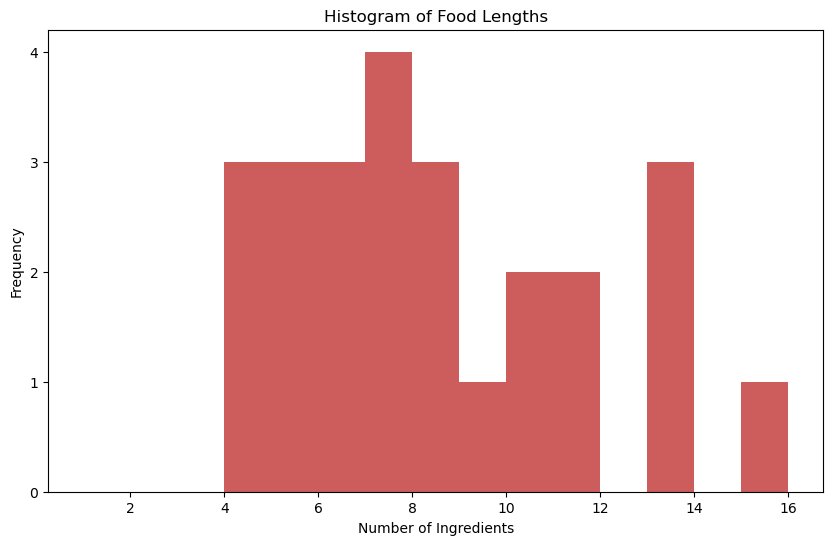

In [4]:
# Iterate through the dictionary and store the ingredient length of each dish
food_lengths = {}
for dish, ingredients in food_ingredients.items():
    length = len(ingredients)
    food_lengths[dish] = length

# Get the lengths list
lengths_list = list(food_lengths.values())

# Plot the histogram
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(lengths_list, bins=range(1, max(lengths_list) + 2), color='indianred')
ax.set_xlabel('Number of Ingredients')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Food Lengths')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Exploratory Network Analysis

## Bipartite Graph and its Projections

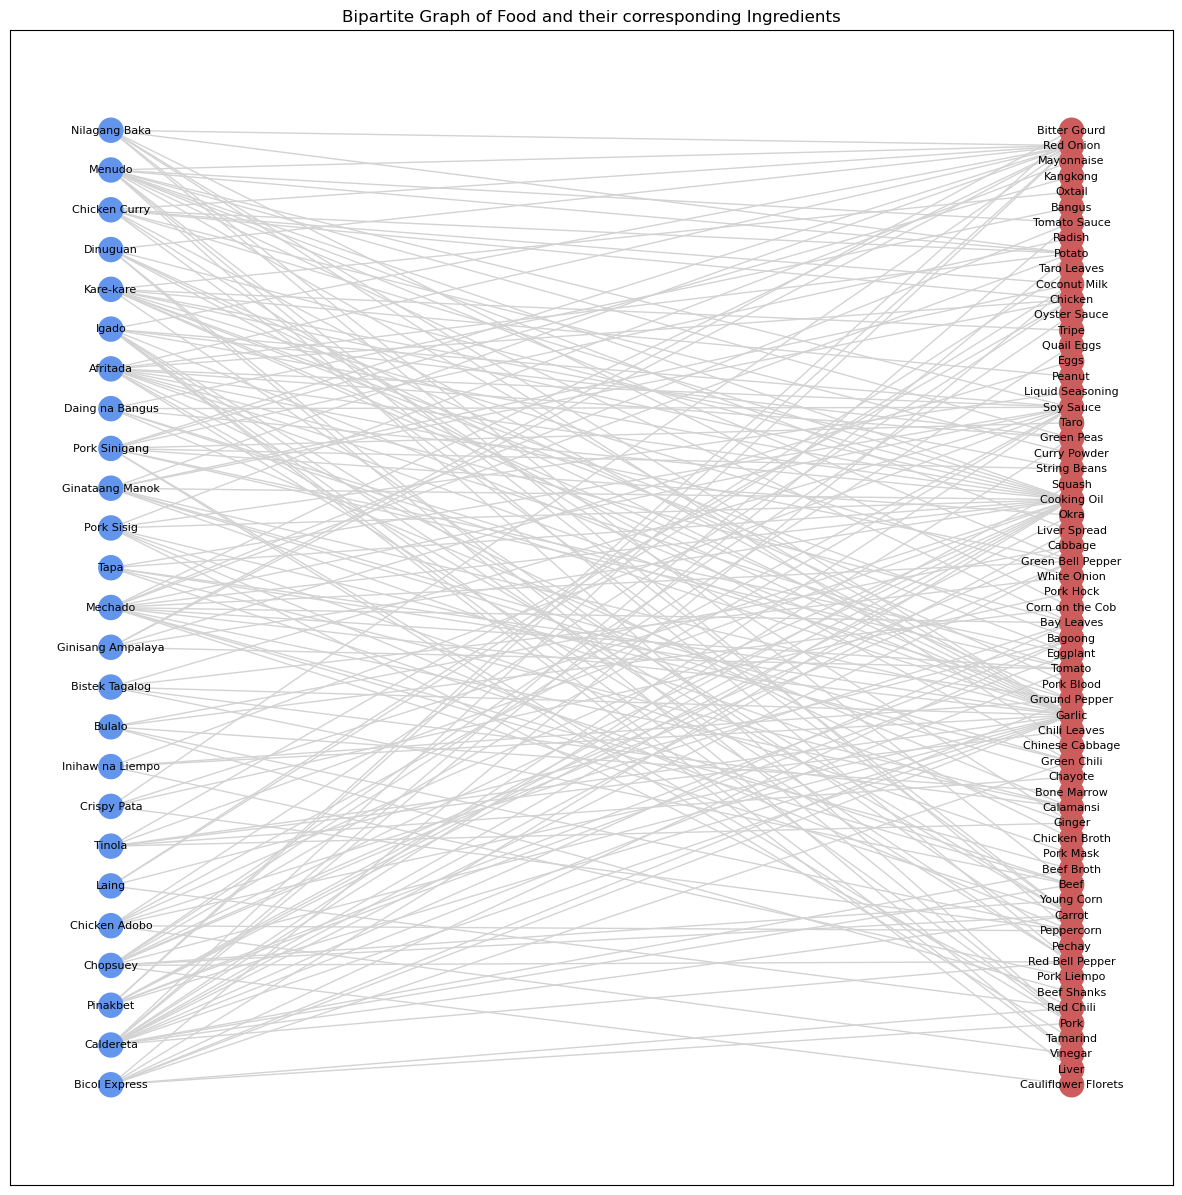

In [5]:
# Create an empty bipartite graph
B = nx.Graph()

# Extract the food dishes and ingredients as separate sets
foods = set(food_ingredients.keys())
ingredients = set(ingredient for ingredients in food_ingredients.values()
                  for ingredient in ingredients)

# Add nodes from both sets to the graph
B.add_nodes_from(foods, bipartite=0)
B.add_nodes_from(ingredients, bipartite=1)

# Create connections between food and ingredient nodes
for food, ingredients in food_ingredients.items():
    for ingredient in ingredients:
        B.add_edge(food, ingredient)

# Create a node color list based on the bipartite attribute
node_color = ['cornflowerblue' if B.nodes[node]['bipartite'] == 0
              else 'indianred' for node in B.nodes]

# Plot the bipartite graph
plt.figure(figsize=(15, 15))  # Set the figure size larger
pos = nx.bipartite_layout(B, foods)
nx.draw_networkx(B, pos=pos, with_labels=True,
                 node_color=node_color, font_size=8, edge_color='#D3D3D3')
plt.title("Bipartite Graph of Food and their corresponding Ingredients")
plt.show()

In [6]:
# Get the projections of the bipartite graph
food_projection = nx.bipartite.projected_graph(B, foods)
ingredient_projection = nx.bipartite.projected_graph(B, ingredients)


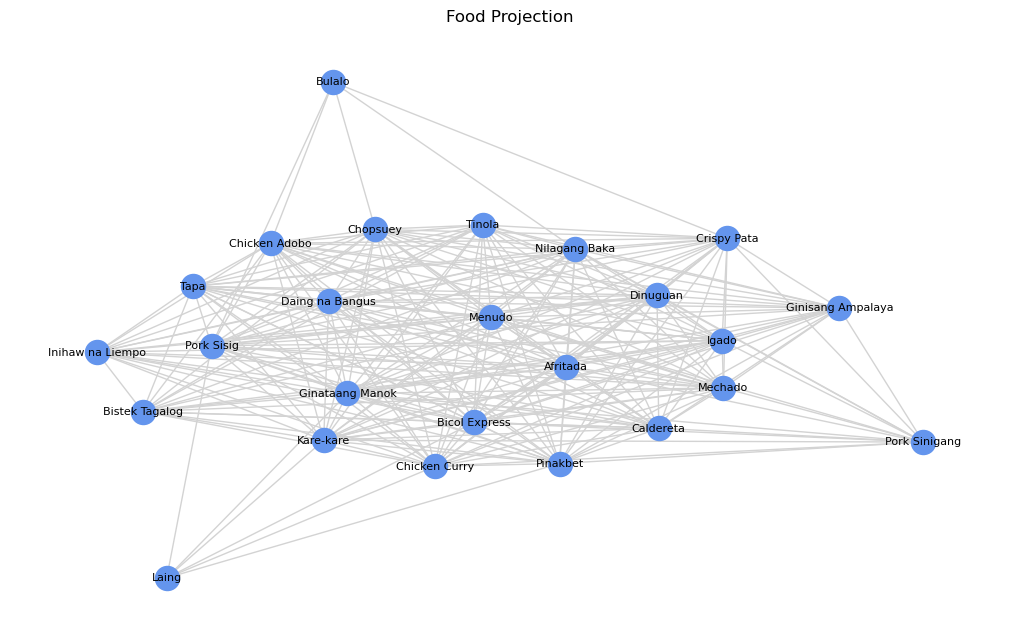

In [7]:
# Plot the food projection
plt.figure(figsize=(10, 6))
pos_food = nx.kamada_kawai_layout(food_projection)
nx.draw(food_projection, pos=pos_food, with_labels=True,
        node_color='cornflowerblue', font_size=8, edge_color='#D3D3D3')
plt.title("Food Projection")
plt.show()

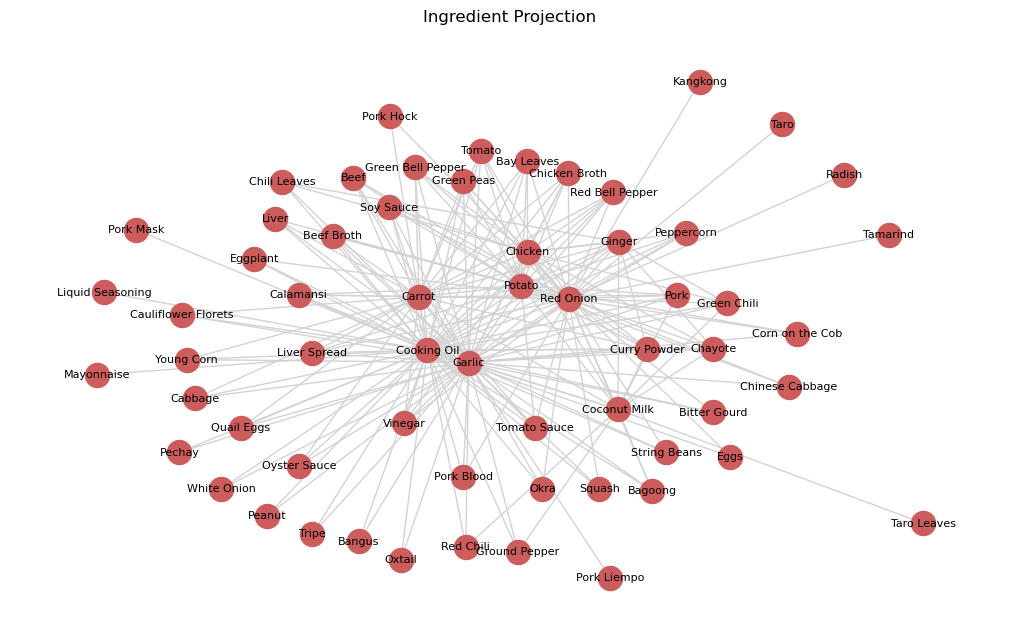

In [8]:
# Plot the ingredient projection
plt.figure(figsize=(10, 6))
pos_ingredient = nx.kamada_kawai_layout(ingredient_projection)
nx.draw(ingredient_projection, pos=pos_ingredient, with_labels=True,
        node_color='indianred', font_size=8, edge_color='#D3D3D3')
plt.title("Ingredient Projection")
plt.show()

## Degree Distribution, Path Lengths, and Clustering Coefficient

In [9]:
def degree_pathlength_clustering(G, title):
    """Calculates degree distribution, pathlength, and clustering coefficient
    of the given network."""
    # Degree Distribution
    degree_sequence = [G.degree(node) for node in G.nodes()]

    # Calculate the diameter and characteristic path length
    diameter = nx.diameter(G)
    characteristic_path_length = nx.average_shortest_path_length(G)

    # Calculate the clustering coefficient
    clustering_coefficient = nx.average_clustering(G)

    # Adjust color
    if title == "Food":
        color = "cornflowerblue"
    else:
        color = "indianred"

    # Plot the degree distribution histogram
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.hist(degree_sequence, bins=range(1, max(degree_sequence) + 2),
            color=color)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Degree Distribution of {title} Projection')
    plt.show()

    # Print the diameter, characteristic path length, and clustering coefficient
    print("Diameter:", diameter)
    print("Characteristic Path Length:", characteristic_path_length)
    print("Clustering Coefficient:", clustering_coefficient)

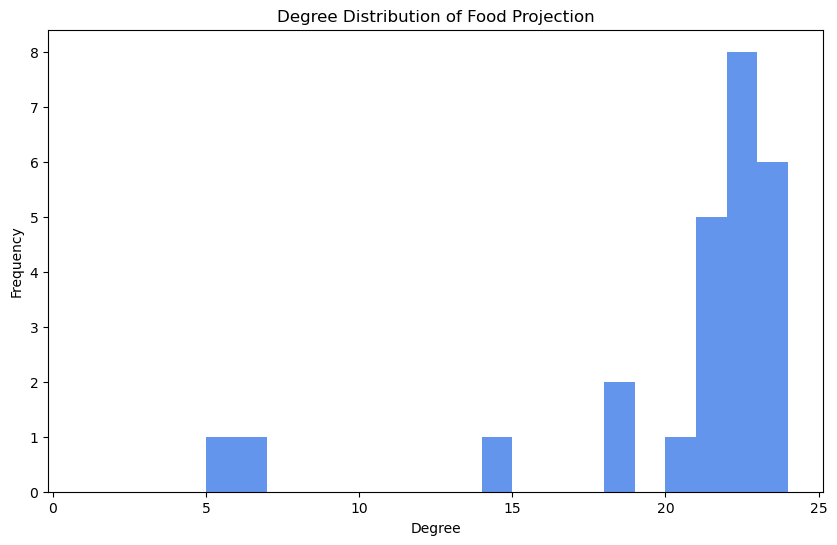

Diameter: 2
Characteristic Path Length: 1.1666666666666667
Clustering Coefficient: 0.9333274688698032


In [10]:
degree_pathlength_clustering(food_projection, "Food")

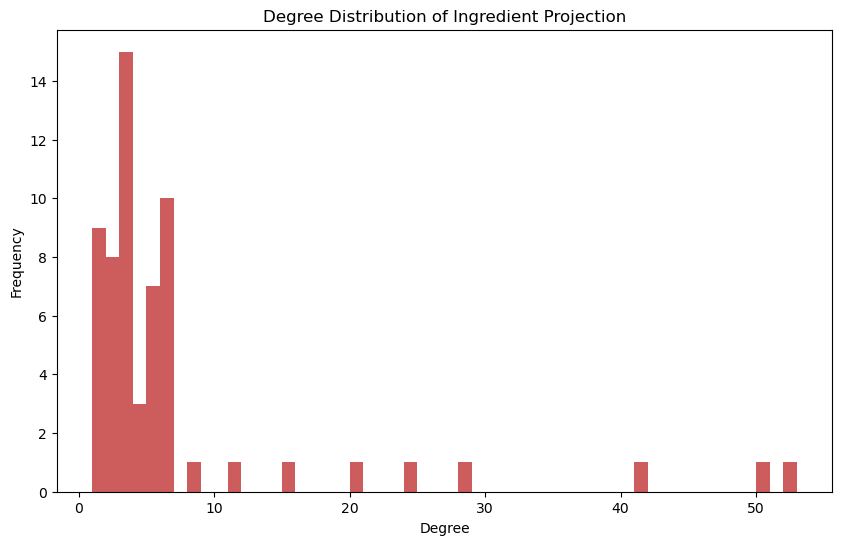

Diameter: 3
Characteristic Path Length: 1.953551912568306
Clustering Coefficient: 0.7653036731993156


In [11]:
degree_pathlength_clustering(ingredient_projection, "Ingredient")

## Centrality Measures

In [12]:
def centrality_measure(G, centrality_measure, title, limit):
    """Calculates the centrality measures of each node. Centrality measures may
    be one of the following: Degree, Closeness, Betweenness, and Eigenvector."""
    # Calculate the centrality measure and sorts it
    if centrality_measure == "Degree":
        cent_measure = nx.degree_centrality(G)
    elif centrality_measure == "Closeness":
        cent_measure = nx.closeness_centrality(G)
    elif centrality_measure == "Betweenness":
        cent_measure = nx.betweenness_centrality(G)
    elif centrality_measure == "Eigenvector":
        cent_measure = nx.eigenvector_centrality(G)

    sorted_cent_measure = {k: v for k, v in sorted(cent_measure.items(),
                                                   key=lambda item: item[1],
                                                   reverse=True)}

    # Get the top 'limit' items
    top_items = dict(list(sorted_cent_measure.items())[:limit])

    # Adjust color
    if title == "Food":
        color = "cornflowerblue"
    else:
        color = "indianred"

    # Plot the degree centrality as a horizontal bar chart
    plt.figure(figsize=(8, 5))
    plt.barh(list(top_items.keys()), list(top_items.values()), color=color)
    plt.xlabel('Degree Centrality')
    plt.ylabel('Node')
    plt.title(f'Top {centrality_measure} Centrality '
              f'Nodes in {title} Projection')
    plt.gca().invert_yaxis()

    # Annotate the value for the top 1 node
    top_node = list(top_items.keys())[0]
    top_value = list(top_items.values())[0]
    plt.text(top_value, top_node, f"{top_value:.4f}", va='center', ha='right',
             color='white', fontweight='bold')
    plt.show()

### Food Projection

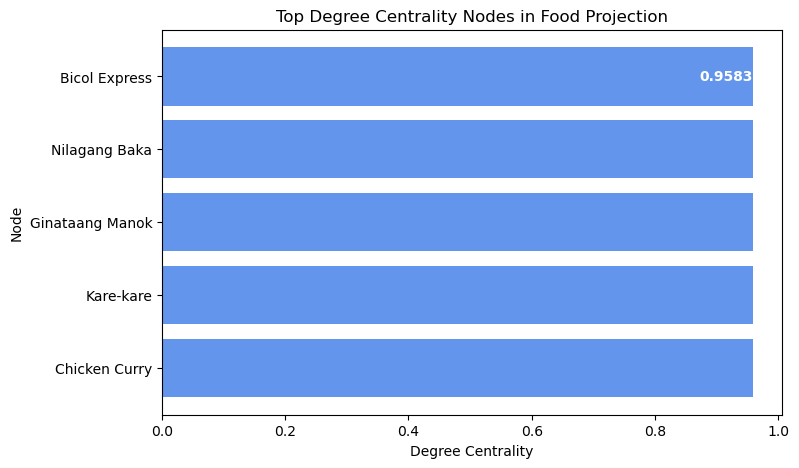

In [13]:
centrality_measure(food_projection, "Degree", "Food", 5)

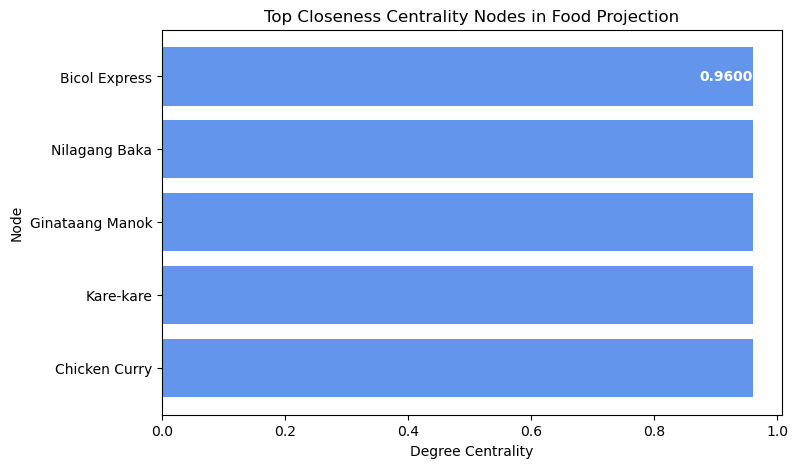

In [14]:
centrality_measure(food_projection, "Closeness", "Food", 5)

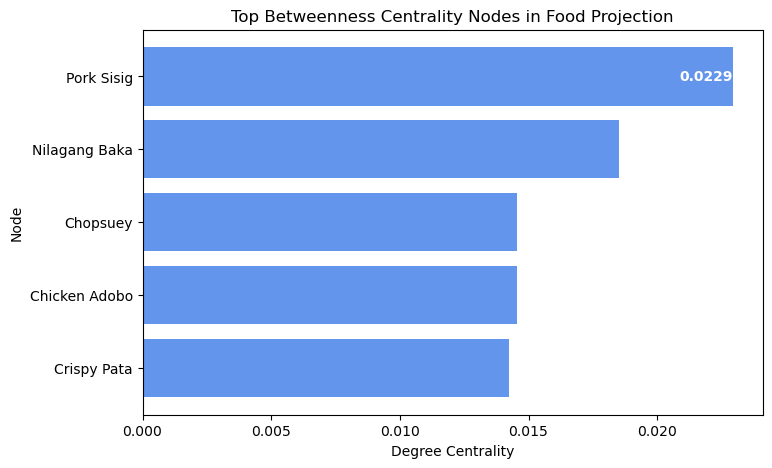

In [15]:
centrality_measure(food_projection, "Betweenness", "Food", 5)

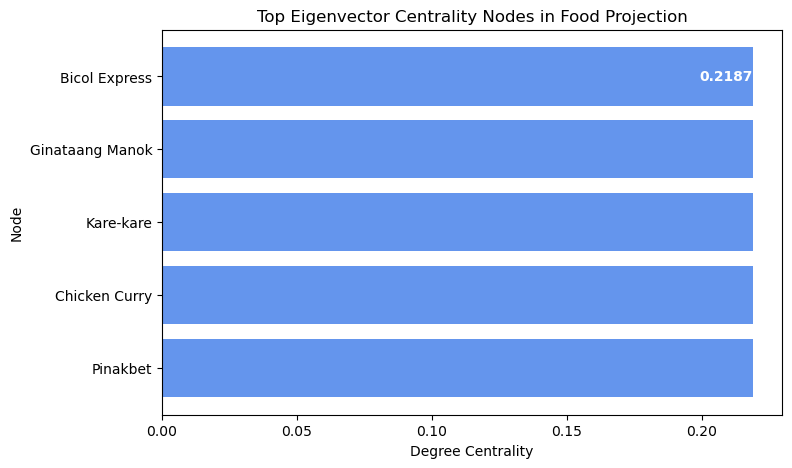

In [16]:
centrality_measure(food_projection, "Eigenvector", "Food", 5)

### Ingredient Projection

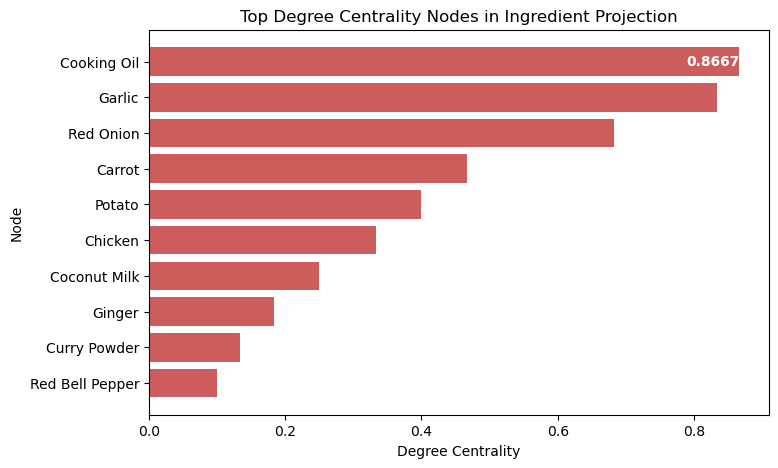

In [17]:
centrality_measure(ingredient_projection, "Degree", "Ingredient", 10)

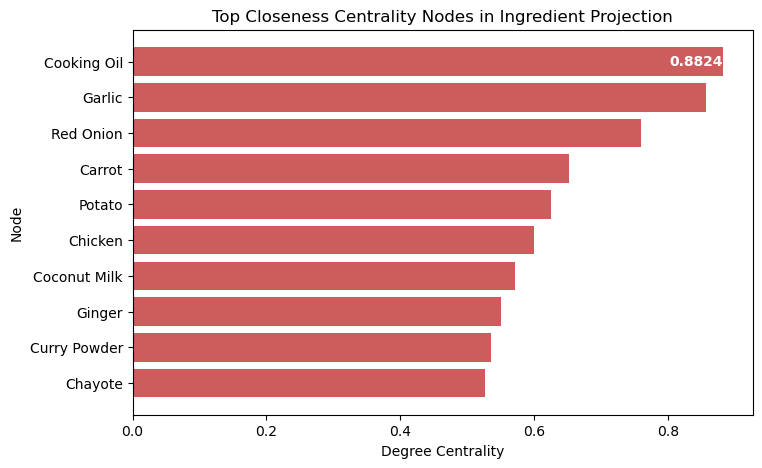

In [18]:
centrality_measure(ingredient_projection, "Closeness", "Ingredient", 10)

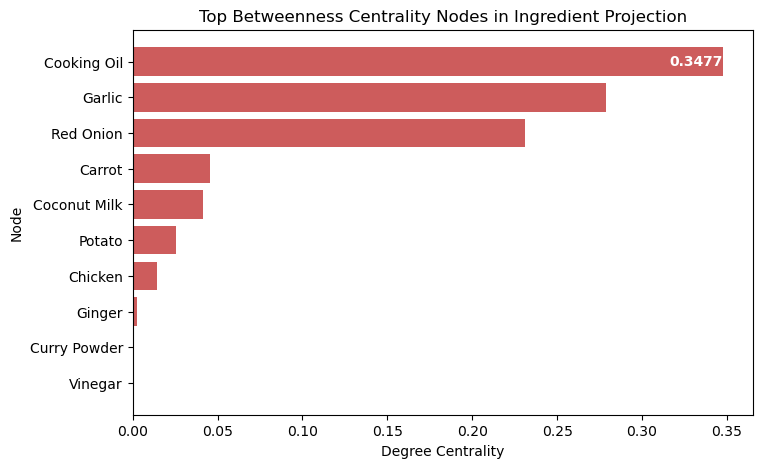

In [19]:
centrality_measure(ingredient_projection, "Betweenness", "Ingredient", 10)

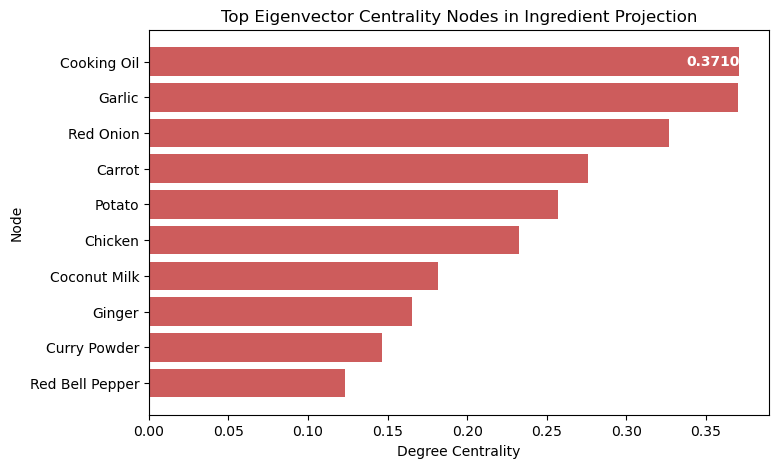

In [20]:
centrality_measure(ingredient_projection, "Eigenvector", "Ingredient", 10)

## Community Detection

In [21]:
def community_detection(G, title):
    """Performs community detection on a given network using Louvain method."""
    # Perform community detection using Louvain method
    partition = community.community_louvain.best_partition(G)

    # Create a layout for visualization
    pos = nx.kamada_kawai_layout(G)

    # Create a list of colors for each community
    colors = [partition[node] for node in G.nodes()]

    # Visualize the network with nodes colored according to their communities
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap='tab20',
            node_size=300, font_size=8, edge_color='#D3D3D3')
    plt.title(f'{title} Projection with Communities (Louvain Method)')
    plt.show()

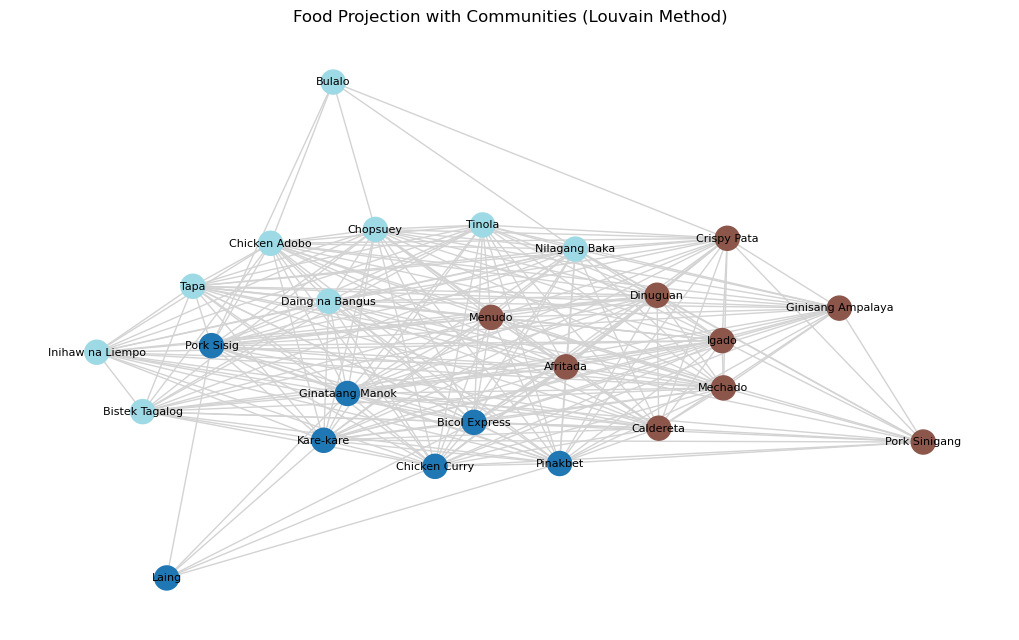

In [22]:
community_detection(food_projection, "Food")

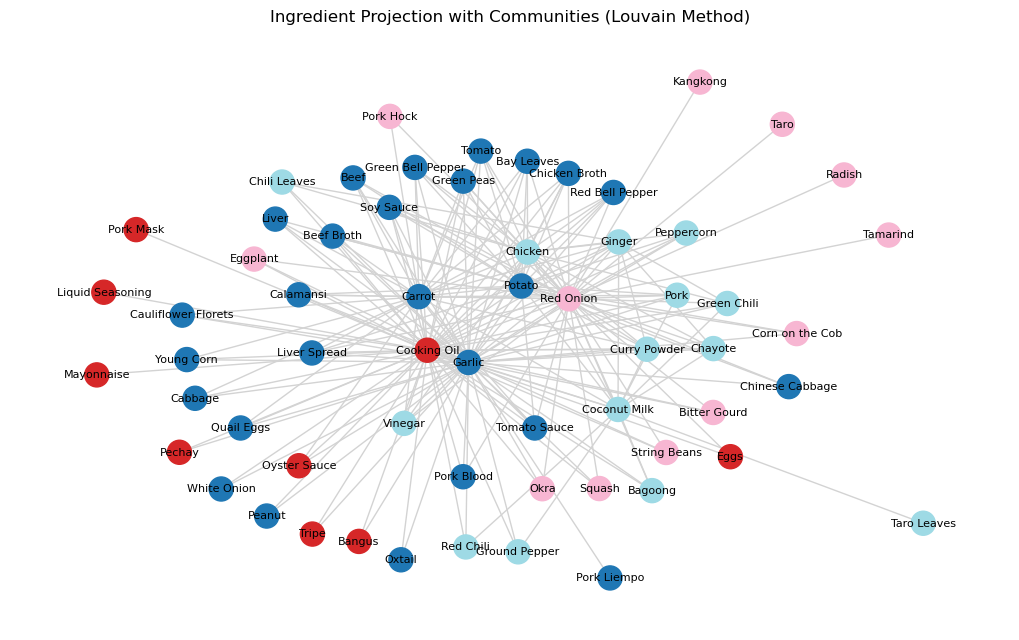

In [23]:
community_detection(ingredient_projection, "Ingredient")